In [14]:
from samkit import SAMkit
import utils
import numpy as np

In [2]:
sk = SAMkit(model_type='vit_b', checkpoint='../sam_vit_b_01ec64.pth', device='cuda')

In [3]:
image = sk.load_image(image='images/building.png')

In [4]:
image.shape

(500, 500, 3)

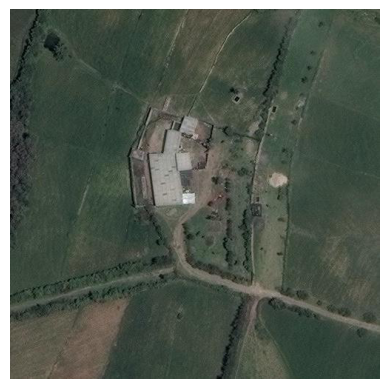

In [5]:
sk.show_image(image)

In [6]:
from datasets import load_dataset

dataset = load_dataset("keremberke/satellite-building-segmentation", "mini")

2023-06-07 15:58:38,789 - Found cached dataset satellite-building-segmentation (/h/vkhazaie/.cache/huggingface/datasets/keremberke___satellite-building-segmentation/mini/1.0.0/2d4f5155d8a688bdff0915214924fbee078bcc85eb80f4d3c5884b8e319ec0ea)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
sample = dataset['train'][0]
image = sample["image"]
bbox = sample['objects']['bbox']
seg_mask = sample['objects']['segmentation']

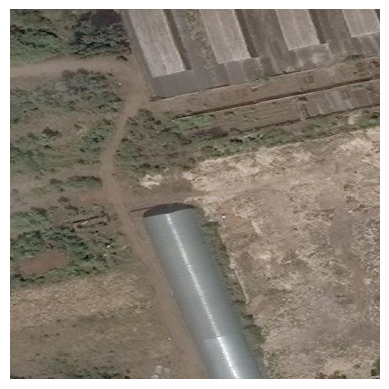

In [8]:
sk.show_image(image)

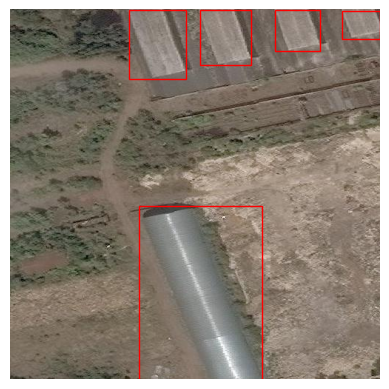

In [9]:
utils.show_bounding_boxes(image=image, bounding_boxes=bbox)

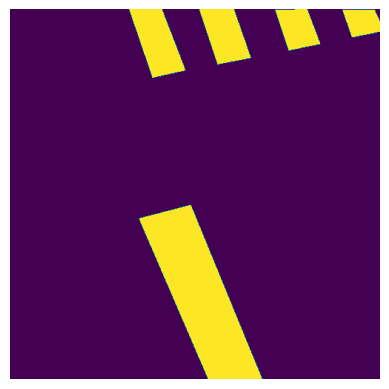

In [10]:
binary_mask = utils.get_segmentation_mask(segmentation_label=sample['objects'], size=500)
sk.show_image(binary_mask)

In [19]:
masks = sk.auto_segment(image=np.array(image))

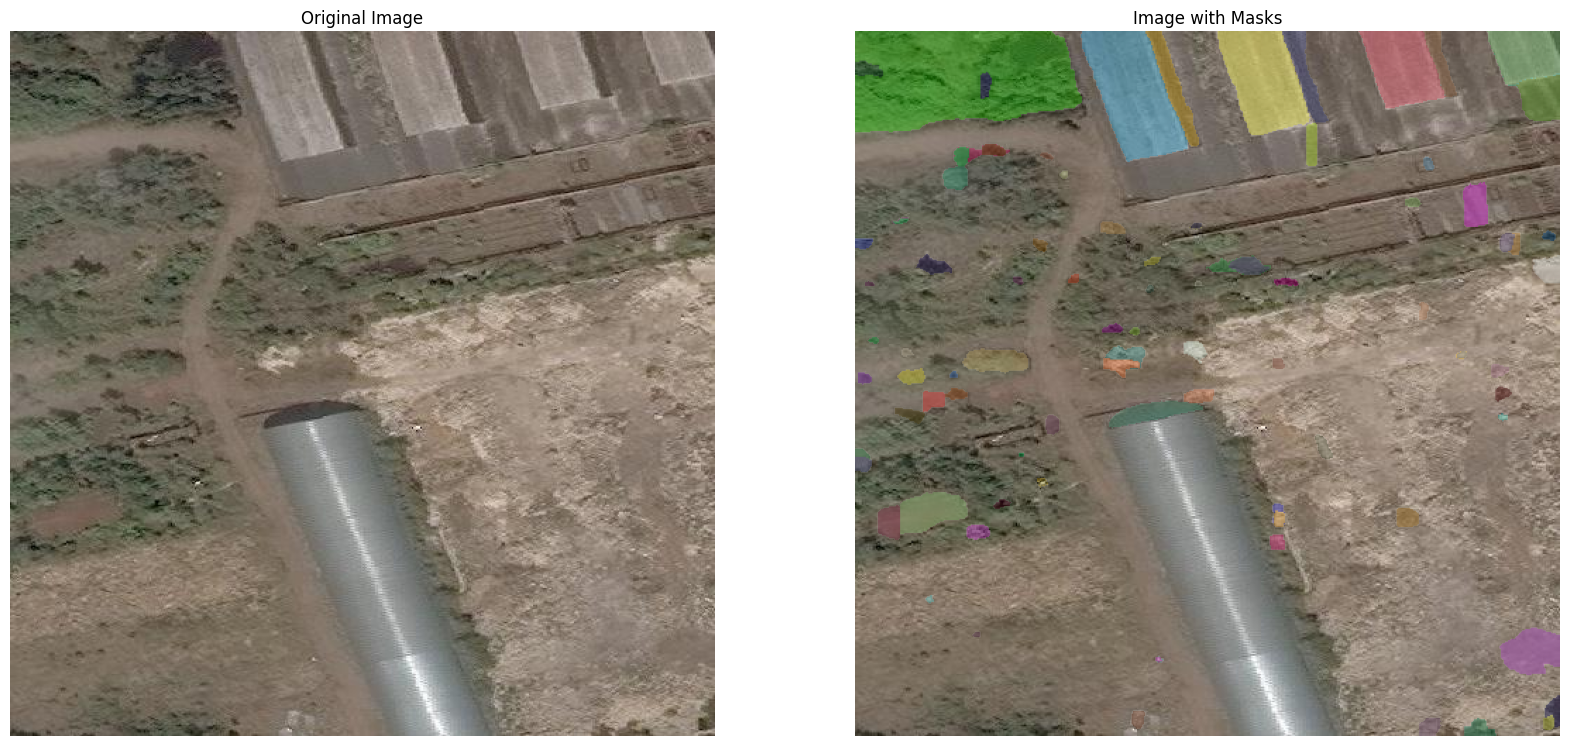

In [20]:
sk.visualize_automask(image=np.array(image), masks=masks)

In [23]:
image, prompt = sk.preprocess_input(image=np.array(image), bbox_prompt=np.array(bbox))

In [25]:
type(image)

numpy.ndarray